## Day 15 - Relative Strength Index

source : https://www.investopedia.com/terms/r/rsi.asp

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [18]:
"""
    :param ticker: closing prices
    :param start: history start date
    :param end: history end date
    :return: stock's historical data 
"""
def get_data(ticker,start="2020-03-25"):
    
    return yf.download(ticker, start)


"""
    :param close: closing prices
    :param length: moving average length
"""
def get_RSI(close,length=20):
    
    # check if the difference is positive or negative
    delta = close.diff(1).dropna()
    
    positive = delta.copy()
    negative = delta.copy()
    
    positive[positive < 0] = 0
    negative[negative > 0] = 0
    
    avg_gain = positive.rolling(window=length).mean()
    avg_loss = abs(negative.rolling(window=length).mean())
    
    rsi = 100 - (100/(1 + avg_gain/avg_loss))
    
    return rsi

In [19]:
stock_history  = get_data('TWTR','2018-03-06')
stock_close = stock_history['Adj Close']

rsi = get_RSI(stock_close,14)

[*********************100%***********************]  1 of 1 completed


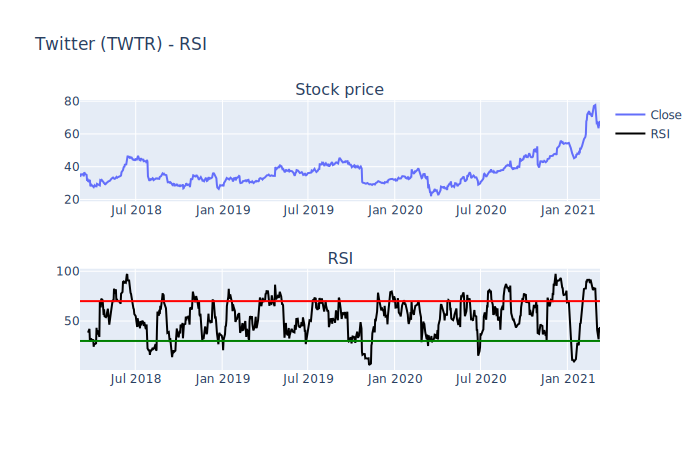

In [44]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Stock price", "RSI"))

fig.add_trace(go.Scatter(x=stock_close.index, y=stock_close, name='Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=rsi.index, y=rsi, name='RSI',line_color="black"),row=2, col=1)
fig.add_hline(y=30,row=2, col=1, line_color="green")
fig.add_hline(y=70,row=2, col=1, line_color="red")


fig.update_layout(title_text="Twitter (TWTR) - RSI",height=700)
# fig.show()

# static rendering for github
fig.show("svg")